# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

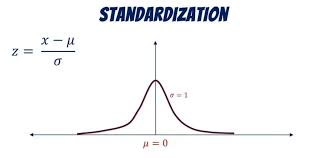


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:


#  Loading the dataset
df = pd.read_csv('ObservationData_lavlqce.csv')

#  Preprocessing: Drop non-numeric columns ('Country') and index ('Year') and also fill missing values (NaNs) with the mean of the column
numeric_df = df.drop(columns=['Country', 'Year']).fillna(df.mean(numeric_only=True))


data_array = numeric_df.to_numpy()

# Calculate Mean and Standard Deviation using NumPy
mean = np.mean(data_array, axis=0)
std = np.std(data_array, axis=0)

# Standardization: (Data - Mean) / Standard Deviation
standardized_data = (data_array - mean) / std

# Display results
print(f"Standardized Data Shape: {standardized_data.shape}")
print(standardized_data[:5])



Standardized Data Shape: (2322, 29)
[[ 0.          0.         -0.38404956 -0.36199338 -0.36900468 -0.36743558
  -0.35601898 -0.39395488 -0.40158995 -0.3288848  -0.41302626 -0.43432464
  -1.36824738 -0.60878942 -1.23212277 -0.67919714 -0.87038706  0.0258651
  -0.74542515 -0.71313751  0.20872162 -0.3931922  -0.38211177 -0.32281631
  -0.74000136 -0.43753575  0.06292451 -0.37755419  0.        ]
 [-1.78287028 -1.75654968 -0.38926399 -0.36199267 -0.36929566 -0.36962615
  -0.35589947 -0.40100004 -0.40140123 -0.34394684 -0.41231193 -0.44078181
  -1.39340534 -0.71780174 -1.22258627 -1.04890016 -0.86340193 -0.46401486
  -0.72226683 -0.88905448  0.21127501 -0.39498819 -0.38425679 -0.27020336
  -0.82673545 -0.54702996  0.09663435  0.16402705 -0.0134958 ]
 [-0.24933395 -0.25966898 -0.38864315 -0.36416333 -0.37127737 -0.37141097
  -0.35785112 -0.39824595 -0.39336642 -0.34846679 -0.41597484 -0.444257
  -1.45283019 -0.73298067 -1.28025937 -0.842467   -0.49784712 -0.57884957
  -0.80666603 -0.94567641  

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [12]:
# Step 3: Calculate the Covariance Matrix
# Get the number of samples (rows) to calculate degrees of freedom (n-1)
n_samples = standardized_data.shape[0]

# Calculate Covariance Matrix using the formula: (Z_transpose dot Z) / (n - 1)

cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)

# Display the results
print(f"Covariance Matrix Shape: {cov_matrix.shape}")
print("First 5 rows of Covariance Matrix:")
print(cov_matrix[:5])

Covariance Matrix Shape: (29, 29)
First 5 rows of Covariance Matrix:
[[ 1.00043085  0.99154991  0.00628833  0.01498046  0.00719089  0.00675348
   0.0070235   0.01653437  0.00333041  0.02446684  0.04364144  0.02236693
  -0.02325681 -0.03372426 -0.01325753  0.15703936  0.07710391  0.1218146
   0.11427275  0.09768036  0.11304602  0.03900535  0.00432491  0.20747534
   0.10726642 -0.03122198  0.1240029   0.07232544 -0.07801377]
 [ 0.99154991  1.00043085 -0.00672558  0.00335964 -0.00506449 -0.01111934
  -0.00360682  0.00415577 -0.00746305  0.01346474  0.02658573  0.00394503
  -0.04304775 -0.05936011 -0.02554091  0.14979597  0.07545711  0.11456151
   0.0920397   0.06777112  0.11880786  0.02073047 -0.01254422  0.21178155
   0.07401818 -0.06376727  0.12172635  0.0563749  -0.07566788]
 [ 0.00628833 -0.00672558  1.00043085  0.95102361  0.93324773  0.86671698
   0.91357879  0.88466755  0.84285949  0.76227369  0.87533101  0.89528968
  -0.11215435 -0.06301654 -0.09667628  0.05513627  0.07270293 -0.0

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [13]:
# Step 4: Perform Eigendecomposition
# Computing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display the results
print("Eigenvalues Shape:", eigenvalues.shape)
print("Eigenvectors Shape:", eigenvectors.shape)
print("First 5 Eigenvalues:")
print(eigenvalues[:5])

Eigenvalues Shape: (29,)
Eigenvectors Shape: (29, 29)
First 5 Eigenvalues:
[11.04348628  3.94924113  2.83249338  2.08937051  1.56844253]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [14]:
# Step 5: Sort Principal Components

# Get the indices that would sort the eigenvalues (low to high)
sorted_indices = np.argsort(eigenvalues)

# Get the indices that would sort the eigenvalues (low to high)
sorted_indices = sorted_indices[::-1]

# Reorder the Eigenvalues based on these sorted indices
sorted_eigenvalues = eigenvalues[sorted_indices]

# Reorder the Eigenvectors to match the new order of Eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Eigenvalues sorted.")
print(sorted_eigenvalues[:5])

Eigenvalues sorted.
[11.04348628  3.94924113  2.83249338  2.08937051  1.56844253]


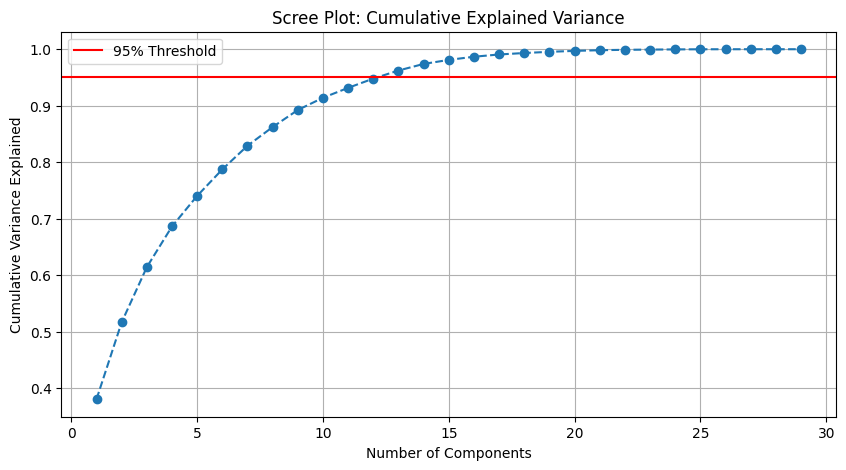

To keep 95% of the data's meaning, we need 13 components.


In [15]:
# 1. Calculating the Explained Variance Ratio
total_variance = np.sum(sorted_eigenvalues)
explained_variance = sorted_eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance)

# 2. Plot of the "Scree Plot"
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Threshold')
plt.title('Scree Plot: Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid()
plt.show()

# 3. Finding the exact number of components for 95% variance
# np.argmax finds the first index where the condition is True
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"To keep 95% of the data's meaning, we need {num_components} components.")

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [16]:
# Step 6: Project Data onto Principal Components

#  Use the dynamic number we found
print(f"Projecting data onto the top {num_components} components (to keep 95% variance)...")

# Selecting the top eigenvectors using the dynamic number we got
top_eigenvectors = sorted_eigenvectors[:, :num_components]

# 3. Projecting the data onto the principal components
reduced_data = np.dot(standardized_data, top_eigenvectors)

# 4. Output the result
print(f"New Reduced Data Shape: {reduced_data.shape}")
print(reduced_data[:5])

Projecting data onto the top 13 components (to keep 95% variance)...
New Reduced Data Shape: (2322, 13)
[[-1.3307072  -1.72581316 -0.57287285 -0.71275509  1.03147117  0.12638437
   1.15836949  0.43533282  0.2842268  -0.13573714  0.49085967  0.14617355
   0.32941607]
 [-1.34120263 -2.51548456  0.24908706 -2.59910318  0.29433576 -0.84841378
   0.43654757  0.46098488  0.26837888 -0.06215444  0.18517066  0.17603628
   0.18916377]
 [-1.31639008 -2.22656088 -0.69733715 -1.13083068  1.00769013  0.21496958
   0.4749722   0.45517788  0.25460796 -0.11487703  0.25030312  0.04636074
   0.11071651]
 [-1.31978376 -2.28701687 -0.93038364 -0.72065619  1.18918288  0.31555155
   0.47945098  0.29232988  0.18258879 -0.03816141  0.27749369  0.02508201
   0.09920688]
 [-1.36831525 -2.72529553 -1.07123639 -0.84726413  0.48193704  0.30922571
   0.94251221  0.39657705 -0.21793363 -0.08808176  0.11917064  0.05943661
   0.0171871 ]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [17]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]

Reduced Data Shape: (2322, 13)


array([[-1.3307072 , -1.72581316, -0.57287285, -0.71275509,  1.03147117,
         0.12638437,  1.15836949,  0.43533282,  0.2842268 , -0.13573714,
         0.49085967,  0.14617355,  0.32941607],
       [-1.34120263, -2.51548456,  0.24908706, -2.59910318,  0.29433576,
        -0.84841378,  0.43654757,  0.46098488,  0.26837888, -0.06215444,
         0.18517066,  0.17603628,  0.18916377],
       [-1.31639008, -2.22656088, -0.69733715, -1.13083068,  1.00769013,
         0.21496958,  0.4749722 ,  0.45517788,  0.25460796, -0.11487703,
         0.25030312,  0.04636074,  0.11071651],
       [-1.31978376, -2.28701687, -0.93038364, -0.72065619,  1.18918288,
         0.31555155,  0.47945098,  0.29232988,  0.18258879, -0.03816141,
         0.27749369,  0.02508201,  0.09920688],
       [-1.36831525, -2.72529553, -1.07123639, -0.84726413,  0.48193704,
         0.30922571,  0.94251221,  0.39657705, -0.21793363, -0.08808176,
         0.11917064,  0.05943661,  0.0171871 ]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

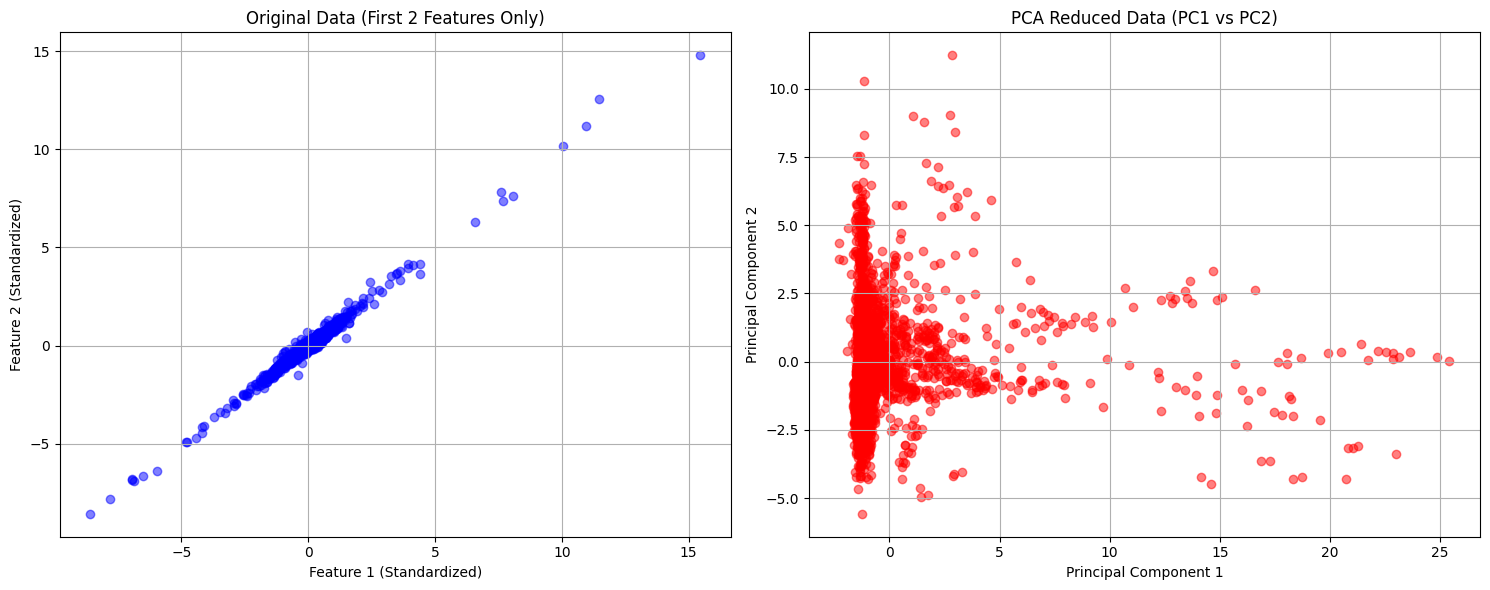

In [18]:
# Step 8: Visualize Before and After PCA
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot original data (first two features for simplicity)
axes[0].scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5, color='blue')
axes[0].set_title('Original Data (First 2 Features Only)')
axes[0].set_xlabel('Feature 1 (Standardized)')
axes[0].set_ylabel('Feature 2 (Standardized)')
axes[0].grid(True)

# Plot reduced data after PCA
axes[1].scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, color='red')
axes[1].set_title('PCA Reduced Data (PC1 vs PC2)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Insight about the effect of PCA**
1. Original Data vs. PCA: Looking at the plot on the left, there is a very obvious straight line. This tells us that the first two features in the dataset (likely the GDP metrics) are almost perfectly correlated—basically, they are repeating the same information. This "redundancy" makes it hard to distinguish between different African economies because they all fall on the same diagonal.

In contrast, the PCA plot on the right spreads the data out into a cloud. Because Principal Components 1 and 2 are calculated to be independent of each other, they reveal hidden structures in the data that weren't visible before. We can now see distinct clusters of countries, likely separating larger, more complex economies from smaller ones.

2. The Complexity of the Data: Even though the PCA plot gives us a much better view than the original features, our analysis in Task 2 showed that we actually need 13 components to capture 95% of the variance. This suggests that the economic landscape of Africa is quite complex; while a 2D plot helps us visualize the main patterns, we really need those 13 dimensions to fully understand the complete economic picture.